# Cas Kaggle Individual - Aprenentatge Computacional 2022-2023

Gabriel Bardají Biescas

Anàlisi de dataset d'una assegurança de vehícles

Enllaç kaggle: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction

In [1]:
# Imports :
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
from IPython.display import display, HTML
import time

In [2]:
def nullCounter(ds):
    print(ds.isnull().sum())
    print(ds.shape)
    

def printColumnTypes(ds):
    for line in ds.columns:
        print(line, type(ds[line][0]))
    print("-------------------------------------------------------")
    print(ds)
    print(ds.shape)
    
def columnSelector(ds):
    nullValues = ds.isnull().sum()
    nullValuesDict = nullValues.to_dict()
    to_drop = []
    to_fill = []

    for key in nullValuesDict:
        if(nullValuesDict[key]/len(ds.axes[0]) >= 0.5):
            print(nullValuesDict[key])
            to_drop.append(key) ##Eliminar columnes
        else:
            to_fill.append(key) ##Omplir amb 0s
            
    return to_drop,to_fill



In [3]:
pd.set_option('display.max_columns', None)
# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

### DATA DESCRIPTION

In [4]:
# Carreguem dataset de train
dataset_train = load_dataset("data/train.csv")





In [5]:
display(HTML(dataset_train[0:5].to_html()))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Id**: Customer identifier  
**Gender**Age: age of customer  
**Driving_License**: Customer has a license to drive or not  
**Region_Code**: Unique code for the region of the customer  
**Previously_Insured**: Customer already had a Vehicle Insurance or not  
**Vehicle_Age**: Age of the Vehicle  
**Vehicle_Damage**: Customer got his/her vehicle damaged in the past or not  
**Annual_Premium**: The amount customer needs to pay as premium in the year  
**Policy Sales Channel**: Anonymized Code for the channel of outreaching to the  customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.  
**Vintage**: Number of days a customer has been associated within the company  
**Response**: Customer is interested or not in acquiring a vehicle insurance.  

In [7]:
#print(dataset_train.shape[1])

In [8]:
num_attributes_train = dataset_train.select_dtypes(include='number')
cat_attributes_train = dataset_train.select_dtypes(exclude='number')

In [9]:
print(num_attributes_train)
print(cat_attributes_train)

Mirem quins atributs son categòrics i quins son numèrics per saber quins tractar.

In [10]:
dataset_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [11]:
#Assegurem que no hi ha cap nul.
nullCounter(dataset_train)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
(381109, 12)


Observem que no hi han dades NULL. Això ens serà molt útil perquè facilita molt l'anàlisi de dades al no haver de tractar forats en blanc al dataset.

In [12]:
dataset_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [13]:
display(f'Number of rows (clients) for train: {dataset_train.shape[0]}')
display(f'Number of columns (characteristics): {dataset_train.shape[1]}')

'Number of rows (clients) for train: 381109'

'Number of columns (characteristics): 12'

Observem quines columnes tenim i el tamany del dataset

<IPython.core.display.Javascript object>


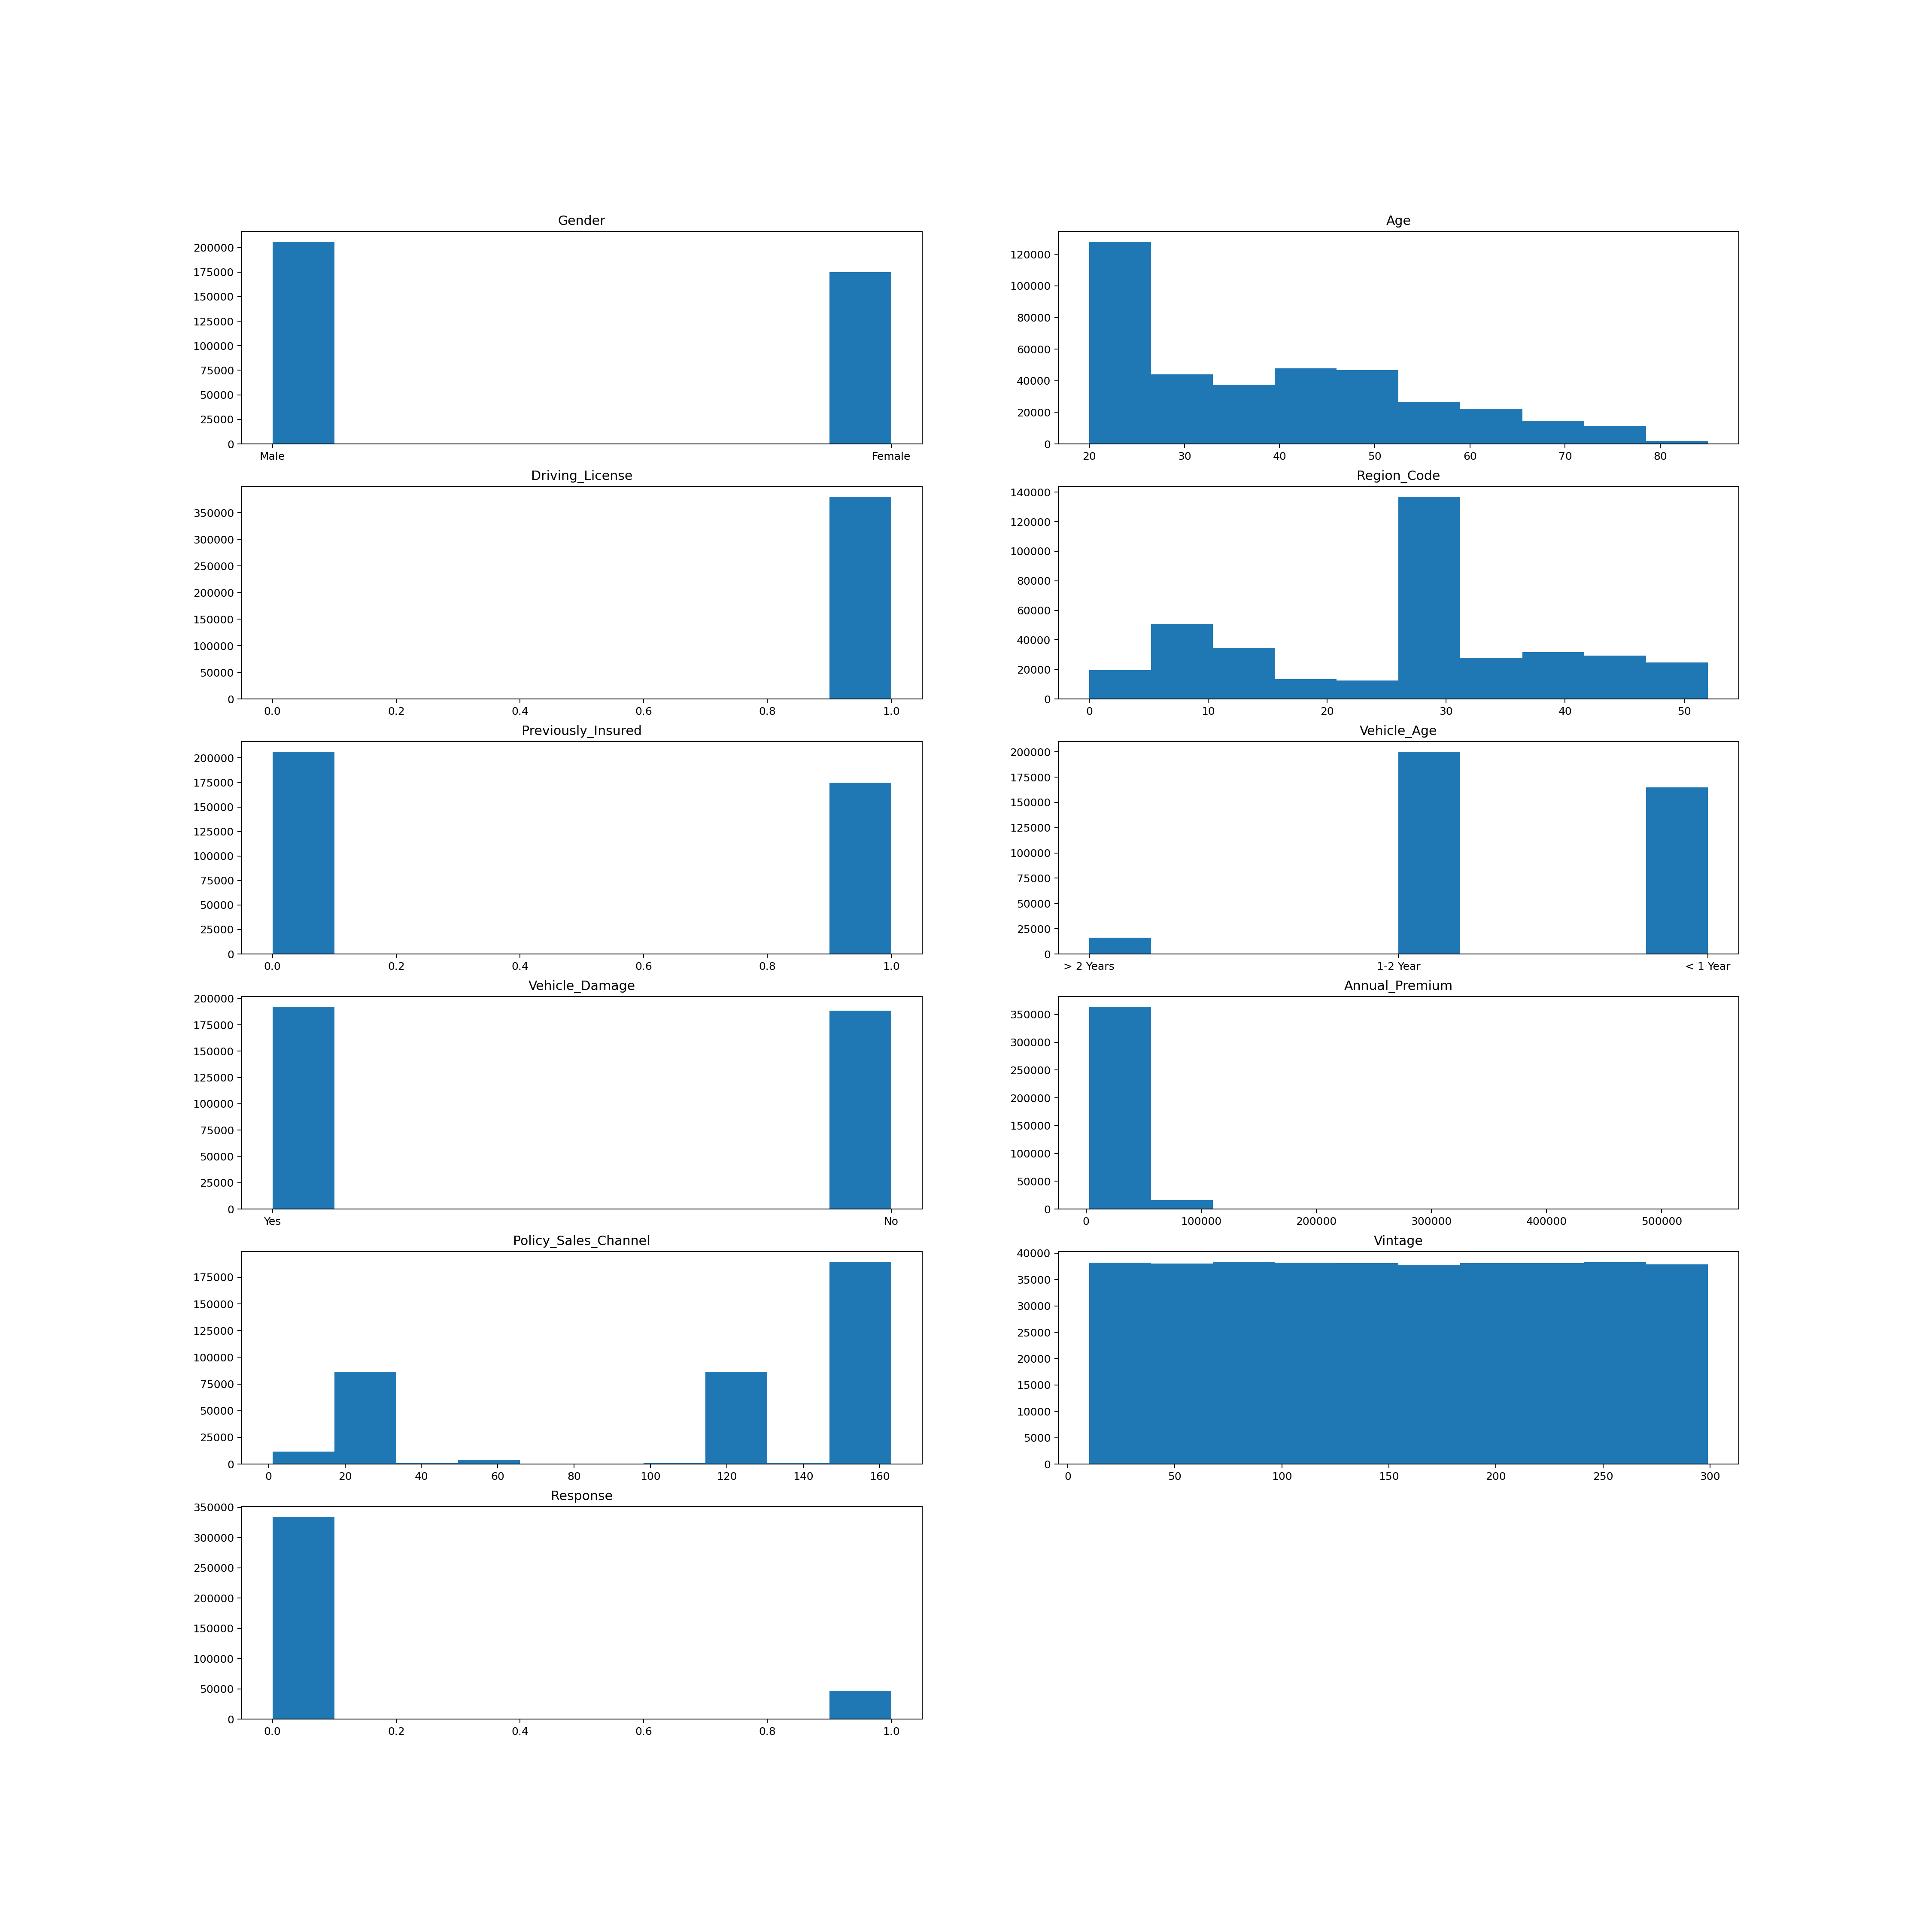

In [15]:
columns = [ 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response']
fig = plt.figure(figsize=(25, 25))
i = 0
for col in columns:
    i+= 1
    fig.add_subplot(6,2,i)
    plt.hist(dataset_train[col])
    plt.title(col)
plt.show()

##### Canviem els valors de les variables categoriques 
En la variable **Vehicle_Age**   
* '> 2 Years' = 0   
* '1-2 Year' = 1  
* < 1 Year = 2  

En la variable **Vehicle_Damage** -> Yes = 1 i No = 0  
En la variable **Gender** -> Male = 1 i Female = 0  

In [16]:
dataset_train['Vehicle_Age'] = dataset_train['Vehicle_Age'].apply(lambda x: 0 if x == '> 2 Years' else 1 if x == '1-2 Year' else 2)
dataset_train['Vehicle_Damage'] = dataset_train['Vehicle_Damage'].replace(['Yes', 'No'], [1, 0])
dataset_train['Gender'] = dataset_train['Gender'].replace(['Male', 'Female'], [1, 0])


In [17]:
display(HTML(dataset_train[0:5].to_html()))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,0,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,0,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,2,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,2,0,27496.0,152.0,39,0


In [18]:
print ("Number of rows with Response = 1: ",len(dataset_train[(dataset_train.Response == 1)]['Response']))

Number of rows with Response = 1:  46710


In [19]:
print ("Number of rows with Response = 0: ",len(dataset_train[(dataset_train.Response == 0)]['Response']))

Number of rows with Response = 0:  334399


In [20]:
#Eliminem un 80% de les columnes amb Response = 0 i veiem com esta més balancejat

Balanced_dataset = dataset_train.drop(dataset_train[dataset_train['Response'] == 0].sample(frac=.8).index)


<IPython.core.display.Javascript object>


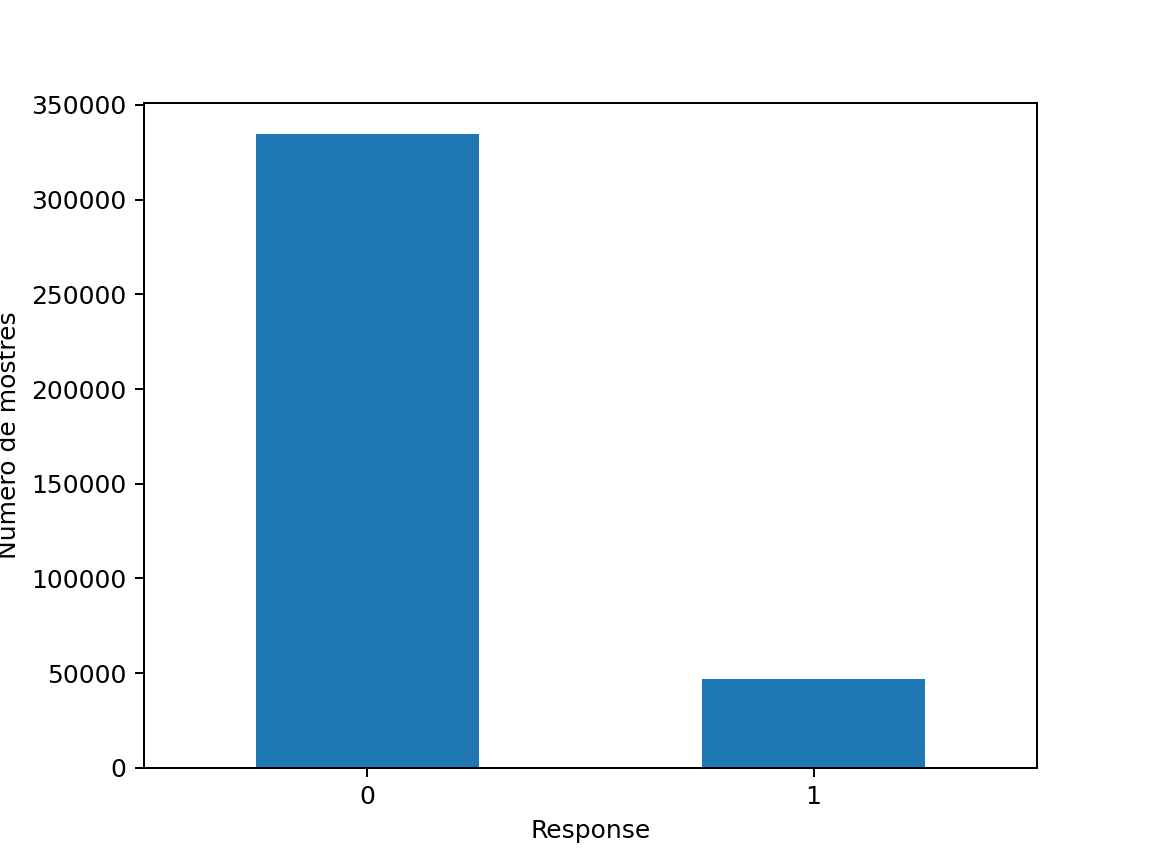

Text(0, 0.5, 'Número de mostres')

In [21]:
plt.figure()
dataset_train['Response'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Response')
plt.ylabel('Número de mostres')

Com podem veure a la grafica d'adalt de response els resultats estan molt desbalancejats per tant crearem un a altre dataset retallant el nombre de files amb 'Response = 0' i comprovarem si milloren els nostres resultats respecte al dataset normal.

<IPython.core.display.Javascript object>


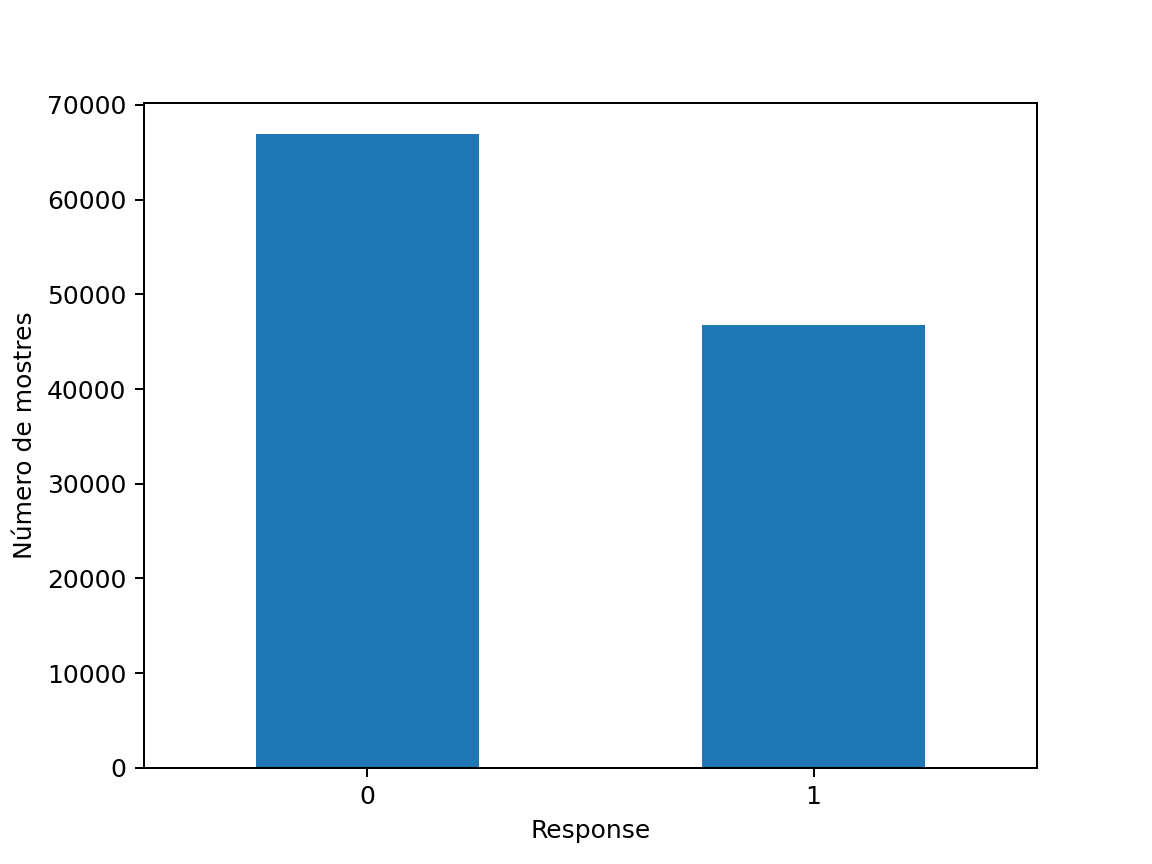

Text(0, 0.5, 'Número de mostres')

In [22]:
plt.figure()
Balanced_dataset['Response'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Response')
plt.ylabel('Número de mostres')

Podem observar que s'han balancejat els resultats en la variable Response

In [23]:
display(HTML(Balanced_dataset[0:5].to_html()))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,0,1,40454.0,26.0,217,1
2,3,1,47,1,28.0,0,0,1,38294.0,26.0,27,1
7,8,0,56,1,28.0,0,1,1,32031.0,26.0,72,1
10,11,0,47,1,35.0,0,1,1,47576.0,124.0,46,1
12,13,0,41,1,15.0,1,1,0,31409.0,14.0,221,0


In [24]:
dataset_train = dataset_train.sample(frac = 0.2)
smll_dataset_train = dataset_train.sample(frac = 0.1)
#display(f'Number of rows (clients) for train: {dataset_train.shape[0]}')
#display(f'Number of columns (characteristics): {dataset_train.shape[1]}'

#display(f'Number of rows (clients) for smll_train: {smll_dataset_train.shape[0]}')
#display(f'Number of columns (characteristics): {smll_dataset_train.shape[1]}')

Reduim el tamany del dataset treient el 80% de les dades per a poder executar els models en un temps que sigui viable.
També creem un smll_dataset_train amb només unes 7000 files, més endevant expliquem el per què.

<IPython.core.display.Javascript object>


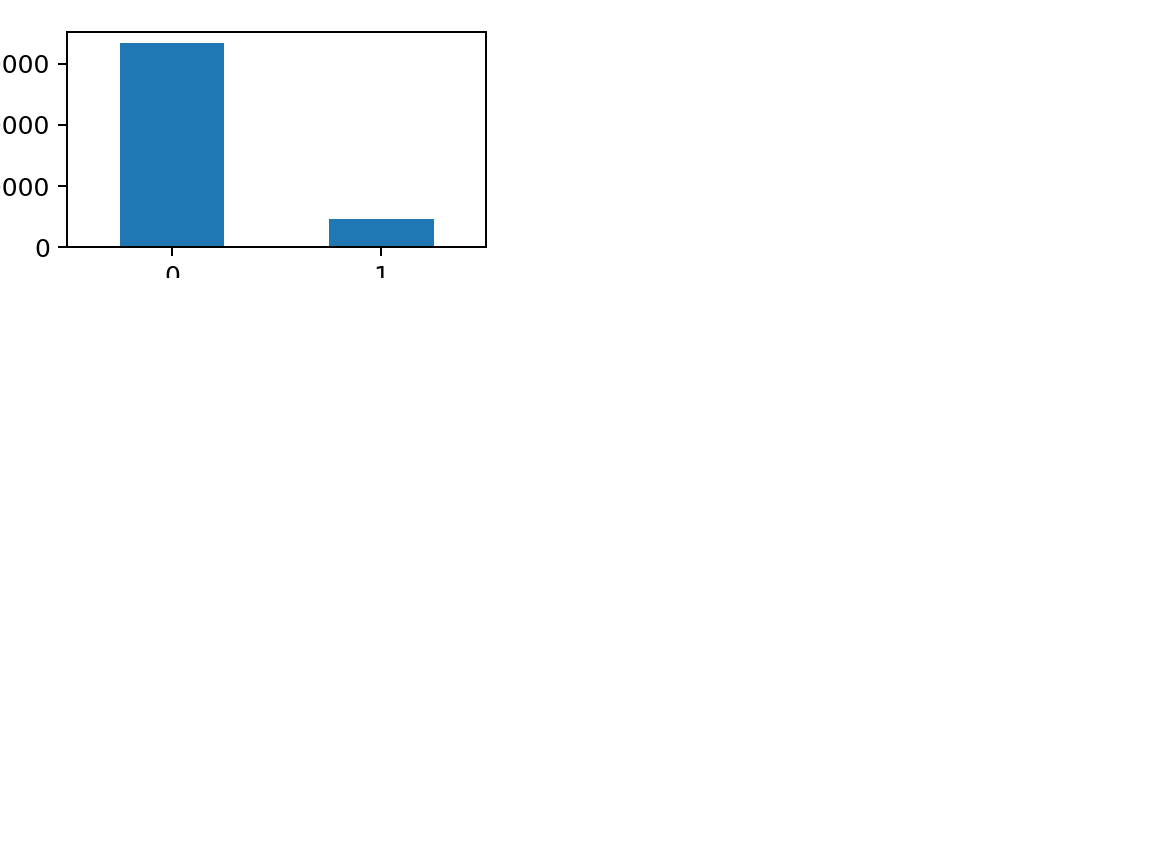

Text(0, 0.5, 'Número de mostres')

In [25]:
plt.figure()
dataset_train['Response'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Response')
plt.ylabel('Número de mostres')

<IPython.core.display.Javascript object>


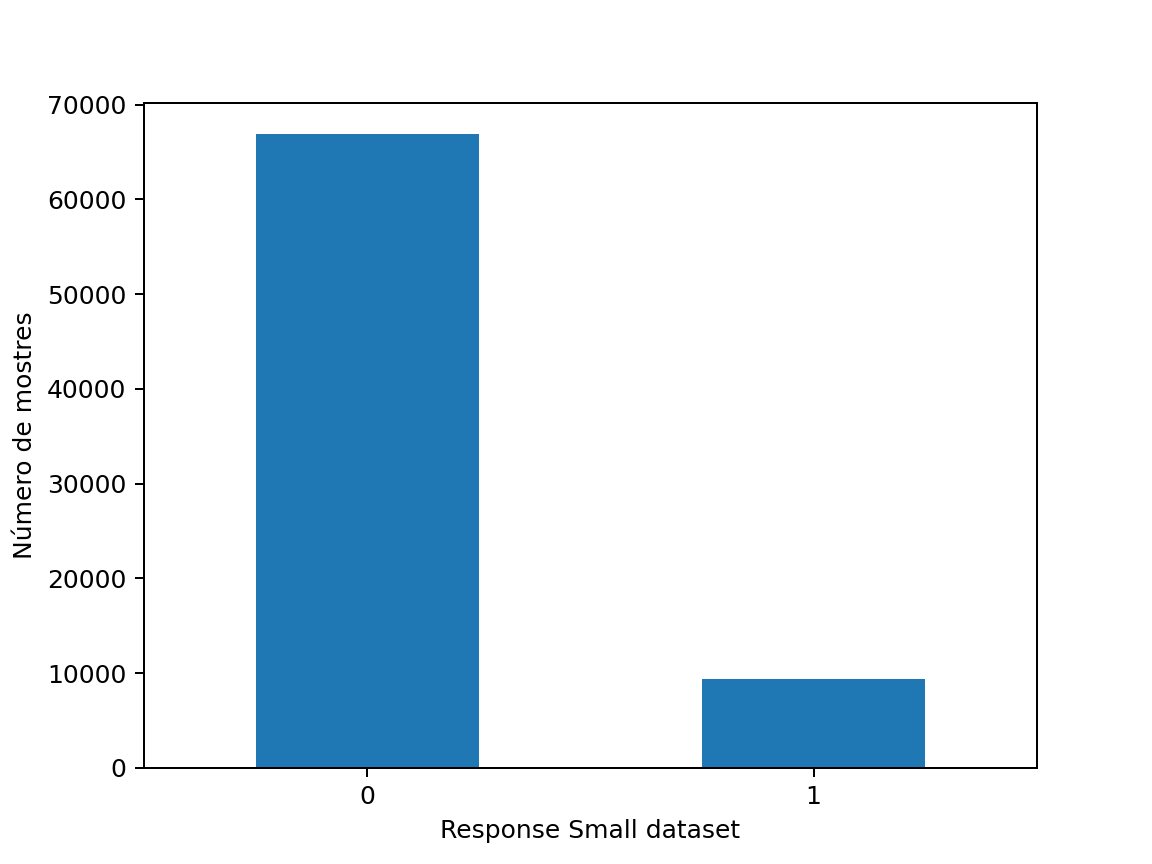

Text(0, 0.5, 'Número de mostres')

In [26]:
plt.figure()
dataset_train['Response'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Response Small dataset')
plt.ylabel('Número de mostres')

### FEATURE SELECTION

Consisteix en seleccionar aquells atributs més rellevants per reduir el nombre de variables amb les que treballarem.

Aquesta funció té un impacte en el cost computacional perquè disminueixm el temps necessari de càlcul.

<IPython.core.display.Javascript object>


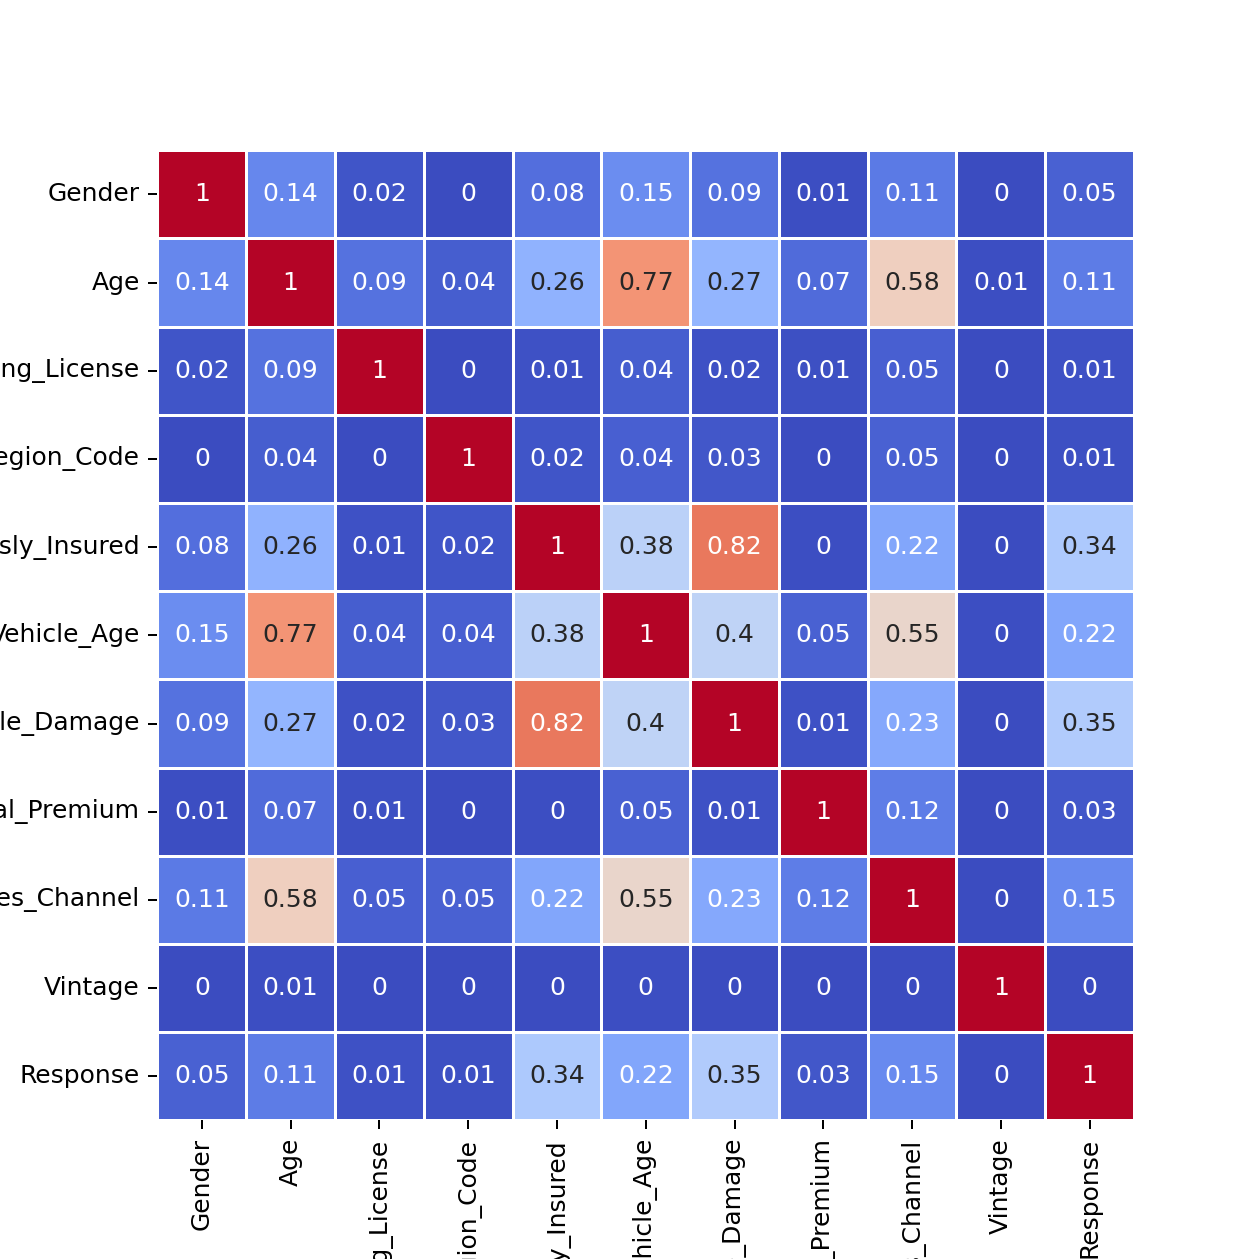

In [54]:
# S'elimina la columna id perquè no ens aporta cap tipus d'informació
corr = dataset_train.drop('id', axis=1).corr().abs()
#mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(7, 7))
sns.heatmap(corr,linewidths=.5, cmap = 'coolwarm', cbar = False, annot = round(corr, 2) )
plt.show()


Observem que aquelles dades que estan més relacionades amb l'atribut objectiu "Response" és Age

In [28]:
# Dataset desbalancejat amb tots els atributs menys id i Gender
ds1 = dataset_train.drop(['id', 'Gender'], axis=1) 

# Dataset Desbalancejat en el que treiem els atributs amb poca correlació més el id i Gender
ds2 = dataset_train.drop(['id', 'Gender', 'Driving_License', 'Region_Code', 'Annual_Premium', 'Vintage'], axis=1) # Treiem els atributs amb poca correlació menys id i Gender

# Dataset Balancejat amb tots els atributs menys id i Gender
ds3 = Balanced_dataset.drop(['id', 'Gender'], axis=1) 

# Dataset Balancejat en el que treiem els atributs amb poca correlació més el id i Gender
ds4 = Balanced_dataset.drop(['id', 'Gender', 'Driving_License', 'Region_Code', 'Annual_Premium', 'Vintage'], axis=1) # Treiem els atributs amb poca correlació menys id i Gender

#Dataset amb 7000 linies amb tots els atributs menys id i Gender
ds5 = smll_dataset_train.drop(['id', 'Gender'], axis=1) # Tot menys id i Gender

#Dataset amb 7000 linies en el que treiem els atributs amb poca correlació més el id i Gender
ds6 = smll_dataset_train.drop(['id', 'Gender', 'Driving_License', 'Region_Code', 'Annual_Premium', 'Vintage'], axis=1) # Treiem els atributs amb poca correlació menys id i Gender
#cols_selected = ['Age', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Policy_Sales_Channel' ]



Creem diferents datasets per veure com es comporten aplicant-los amb els diversos models.    
La columna Gender la elimino del dataset ja que considero que no és etic treballar amb un tipus de dada com aquesta.  
Els atributs amb menys correlació i en alguns datasets són els següents, ['id', 'Gender', 'Driving_License', 'Region_Code', 'Annual_Premium', 'Vintage']


# ESTANDARITZACIÓ DE LES DADES
Es crea una funció per a estandaritzar les dades 

In [29]:
from sklearn.preprocessing import StandardScaler
def standaritzador(data):
    """
    Given a DataFrame, standarizes all the columns
    :param data: DataFrame data
    :return: DataFrame data standarized
    """
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

# DIVISIÓ EN TRAIN i TEST

Una vegada hem visualitzat totes les dades, les separem en train i test per tal de no barrejar-les.
Farem una divisió simple amb la funció propia de sklearn anomenada : train_test_split()

Tot això es produïra dins d'una funció anomenada RndomSearch que es cridara per ver la divisió del train-test i a la vegada escollirà els hiperparàmetres amb millors resultats utilitzant el Random Search. 


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report
#from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsClassifier

In [31]:
def RndmSearch(model, param_grid, iterations, dataset):
    x = dataset.drop('Response', axis=1).values    
    x = standaritzador(x)
    y = dataset.values[:,-1]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    start = time.time()
    rand = RandomizedSearchCV(model, param_grid, cv=10, scoring='accuracy', n_iter=iterations, random_state=5)
    rand.fit(X_train,y_train)    
    end = time.time()
    #dc = rand.predict(X_test)
    #proba = rand.predict_proba(X_test)
    
    print("Time : " + str(end - start) )
    #print(f"Model Accuracy: {accuracy_score(y_test, dc):.3f}")
    #print(f"ROC AUC Score: {roc_auc_score(y_test, proba[:, -1]):.4f}")    
    print("Best parameters: ", rand.best_params_)
    print("Best Score: ", rand.best_score_)
    print("Best estimator: ", rand.best_estimator_)
    print('=============================================================================')

## KNN



# SELECCIÓ DEL MODEL

Utilitzarem diferents models de classificació, juntament amb l'eina Random Search, per trobar el model que ens dongui millors resultats. Els models que es provaran:

* KNN
* Regresor Logístic
* Gradient Descent
* Random Forest
* Naive Bayes

In [32]:
knn_param_dist = param_dist = dict(n_neighbors=[1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30], weights=['uniform', 'distance'])

print("Tots els atributs amb small dataset")
knn5 = KNeighborsClassifier()
RndmSearch(knn5, knn_param_dist, 40, ds5)

print("Atributs selecionats amb small dataset")
knn6 = KNeighborsClassifier()
RndmSearch(knn6, knn_param_dist, 40, ds6)

print("Tots els atributs amb Response desbalancejat")
knn1 = KNeighborsClassifier()
RndmSearch(knn1, knn_param_dist, 40, ds1)

print("Atributs selecionats amb Response desbalancejat")
knn2 = KNeighborsClassifier()
RndmSearch(knn2, knn_param_dist, 40, ds2)

print("Tots els atributs amb Response balancejat")
knn3 = KNeighborsClassifier()
RndmSearch(knn3, knn_param_dist, 40, ds3)

print("Atributs selecionats amb Response balancejat")
knn4 = KNeighborsClassifier()
RndmSearch(knn4, knn_param_dist, 40, ds4)

Tots els atributs amb small dataset
Time : 17.761468648910522
Best parameters:  {'weights': 'uniform', 'n_neighbors': 18}
Best Score:  0.8750197851893725
Best estimator:  KNeighborsClassifier(n_neighbors=18)
Atributs selecionats amb small dataset
Time : 8.524007081985474
Best parameters:  {'weights': 'uniform', 'n_neighbors': 30}
Best Score:  0.867311906107836
Best estimator:  KNeighborsClassifier(n_neighbors=30)
Tots els atributs amb Response desbalancejat
Time : 376.3560528755188
Best parameters:  {'weights': 'uniform', 'n_neighbors': 30}
Best Score:  0.8752152570289663
Best estimator:  KNeighborsClassifier(n_neighbors=30)
Atributs selecionats amb Response desbalancejat
Time : 167.583984375
Best parameters:  {'weights': 'uniform', 'n_neighbors': 30}
Best Score:  0.8760024783546075
Best estimator:  KNeighborsClassifier(n_neighbors=30)
Tots els atributs amb Response balancejat
Time : 795.5129058361053
Best parameters:  {'weights': 'uniform', 'n_neighbors': 29}
Best Score:  0.7685534926

## LOGISTIC REGRESSION


A continuació s'aplicarà un regresor logístic i s'obtindrà unes mètriques per estudiar el seu comportament.
Definim els paràmetres del Random Search i preparem les dades del model

In [33]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

In [34]:
param_grid = [
    {
        'penalty' : ['l2'],
        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'warm_start' : ['True', 'False']
    },
    {
        'penalty' : ['l1'],
        'solver' : ['liblinear', 'saga'],
        'warm_start' : ['True', 'False']
    }
]
print("Tots els atributs amb small dataset")
lg5 = LogisticRegression()
RndmSearch(lg5, param_grid, 14, ds5)

print("Atributs selecionats amb small dataset")
lg6 = LogisticRegression()
RndmSearch(lg6, param_grid, 14, ds6)

print("Tots els atributs amb Response desbalancejat")
lg1 = LogisticRegression()
RndmSearch(lg1, param_grid, 14, ds1)

print("Atributs selecionats amb Response desbalancejat")
lg2 = LogisticRegression()
RndmSearch(lg2, param_grid, 14, ds2)

print("Tots els atributs amb Response balancejat")
lg3 = LogisticRegression()
RndmSearch(lg3, param_grid, 14, ds3)

print("Atributs selecionats amb Response balancejat")
lg4 = LogisticRegression()
RndmSearch(lg4, param_grid, 14, ds4)

Tots els atributs amb small dataset


C:\Users\bielb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bielb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bielb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bielb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bielb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\bielb\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

Time : 6.848613977432251
Best parameters:  {'warm_start': 'True', 'solver': 'liblinear', 'penalty': 'l2'}
Best Score:  0.8728883684621389
Best estimator:  LogisticRegression(solver='liblinear', warm_start='True')
Atributs selecionats amb small dataset
Time : 2.032534122467041
Best parameters:  {'warm_start': 'False', 'solver': 'saga', 'penalty': 'l2'}
Best Score:  0.8730525720746185
Best estimator:  LogisticRegression(solver='saga', warm_start='False')
Tots els atributs amb Response desbalancejat
Time : 44.46659779548645
Best parameters:  {'warm_start': 'True', 'solver': 'liblinear', 'penalty': 'l1'}
Best Score:  0.8770519974095405
Best estimator:  LogisticRegression(penalty='l1', solver='liblinear', warm_start='True')
Atributs selecionats amb Response desbalancejat
Time : 25.16429591178894
Best parameters:  {'warm_start': 'True', 'solver': 'newton-cg', 'penalty': 'l2'}
Best Score:  0.8768551981298515
Best estimator:  LogisticRegression(solver='newton-cg', warm_start='True')
Tots els a

# Gradien Descent

El Descens de Gradient és un algorisme d'optimització que ajusta el valors dels pesos de cada atribut per tal de reduir l'error o el MSE i fa augmentar la accuraccy.

Aplicarem la mateixa estratègia en tots els models, s'utilitzarà Random Search pròpi per trobar la millor combinació de paràmetres.

In [35]:
param_grid = {
    'alpha': [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1], # learning rate
    'max_iter' : [5000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}


from sklearn.linear_model import SGDClassifier

print("Tots els atributs amb small dataset")
gd5 = SGDClassifier()
RndmSearch(gd5, param_grid, 8, ds5)

print("Atributs selecionats amb small dataset")
gd6 = SGDClassifier()
RndmSearch(gd6, param_grid, 8, ds6)

print("Tots els atributs amb Response desbalancejat")
gd1 = SGDClassifier()
RndmSearch(gd1, param_grid, 8, ds1)

print("Atributs selecionats amb Response desbalancejat")
gd2 = SGDClassifier()
RndmSearch(gd2, param_grid, 8, ds2)

print("Tots els atributs amb Response balancejat")
gd3 = SGDClassifier()
RndmSearch(gd3, param_grid, 8, ds3)

print("Atributs selecionats amb Response balancejat")
gd4 = SGDClassifier()
RndmSearch(gd4, param_grid, 8, ds4)





Tots els atributs amb small dataset
Time : 2.086421012878418
Best parameters:  {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 5000, 'loss': 'log', 'alpha': 0.1}
Best Score:  0.8743648550432044
Best estimator:  SGDClassifier(alpha=0.1, loss='log', max_iter=5000, n_jobs=-1)
Atributs selecionats amb small dataset
Time : 1.911933183670044
Best parameters:  {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 5000, 'loss': 'log', 'alpha': 0.1}
Best Score:  0.8738725133920159
Best estimator:  SGDClassifier(alpha=0.1, loss='log', max_iter=5000, n_jobs=-1)
Tots els atributs amb Response desbalancejat
Time : 29.520914554595947
Best parameters:  {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 5000, 'loss': 'log', 'alpha': 0.01}
Best Score:  0.877445595968919
Best estimator:  SGDClassifier(alpha=0.01, loss='log', max_iter=5000, n_jobs=-1)
Atributs selecionats amb Response desbalancejat
Time : 24.033271074295044
Best parameters:  {'penalty': 'l2', 'n_jobs': -1, 'max_iter': 5000, 'loss': 'log', 'alpha': 0.01}
Best

# Random Forest

En aquest cas, al ser un model bastant lent, probem totes les combinacions d'hiperparàmetres possibles amb el smll_dataset_train, que com ja hem dit conté només 7000 linies i pertant podra trobar aquesta combinació més ràpid. 

Aleshores per aplicar aquest model als datasets més grans, directament fem que només probi els hiperparametres utilitzats en el best score.

In [36]:
param_grid = {
    'n_estimators' : [50, 75, 100],
    'criterion' : ['gini', 'entropy'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'warm_start' : [False],
    'class_weight' : ['balanced', 'balanced_subsample']
}

from sklearn.ensemble import RandomForestClassifier

print("Tots els atributs small dataset")
clf5 = RandomForestClassifier()
RndmSearch(clf5, param_grid, 36, ds5)

print("Atributs selecionats small dataset")
clf6 = RandomForestClassifier()
RndmSearch(clf6, param_grid, 36, ds6)




Tots els atributs small dataset
Time : 159.37692856788635
Best parameters:  {'warm_start': False, 'n_estimators': 100, 'max_features': 'log2', 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}
Best Score:  0.8655053971843119
Best estimator:  RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='log2')
Atributs selecionats small dataset
Time : 89.06770730018616
Best parameters:  {'warm_start': False, 'n_estimators': 50, 'max_features': 'sqrt', 'criterion': 'entropy', 'class_weight': 'balanced_subsample'}
Best Score:  0.7748044361893995
Best estimator:  RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_features='sqrt', n_estimators=50)


best_param_all son els millors parametres trobats en el smll_dataset_train sense eliminar cap atribut, en canvi best_param_some son els millors parametres trobats en el smll_dataset_train eliminant els atributs amb menys correlació.

In [38]:
best_param_all = {'warm_start': [False], 'n_estimators': [75], 'max_features': ['log2'], 'criterion': ['entropy'], 'class_weight': ['balanced']}
best_param_some = {'warm_start': [False], 'n_estimators': [50], 'max_features': ['log2'], 'criterion': ['gini'], 'class_weight': ['balanced_subsample']}
print("Tots els atributs amb Response desbalancejat")
clf1 = RandomForestClassifier()
RndmSearch(clf1, best_param_all, 1, ds1)

print("Atributs selecionats amb Response desbalancejat")
clf2 = RandomForestClassifier()
RndmSearch(clf2, best_param_some, 1, ds2)

print("Tots els atributs amb Response balancejat")
clf3 = RandomForestClassifier()
RndmSearch(clf3, best_param_all, 1, ds3)

print("Atributs selecionats amb Response balancejat")
clf4 = RandomForestClassifier()
RndmSearch(clf4, best_param_some, 1, ds4)

Tots els atributs amb Response desbalancejat
Time : 53.17414450645447
Best parameters:  {'warm_start': False, 'n_estimators': 75, 'max_features': 'log2', 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Score:  0.865572304806847
Best estimator:  RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', n_estimators=75)
Atributs selecionats amb Response desbalancejat
Time : 14.31782341003418
Best parameters:  {'warm_start': False, 'n_estimators': 50, 'max_features': 'log2', 'criterion': 'gini', 'class_weight': 'balanced_subsample'}
Best Score:  0.7253226575952892
Best estimator:  RandomForestClassifier(class_weight='balanced_subsample', max_features='log2',
                       n_estimators=50)
Tots els atributs amb Response balancejat
Time : 106.50674366950989
Best parameters:  {'warm_start': False, 'n_estimators': 75, 'max_features': 'log2', 'criterion': 'entropy', 'class_weight': 'balanced'}
Best Score:  0.7614226708814

# Naive Bayes

No utilitzarem cap paràmetres a l'hora de fer el fit. utilitzarem la configuarció per defecte.

In [39]:
param_grid = {
}

from sklearn.naive_bayes import GaussianNB

print("Tots els atributs amb Response desbalancejat")
gnb1 = GaussianNB()
RndmSearch(gnb1, param_grid, 1, ds1)

print("Atributs selecionats amb Response desbalancejat")
gnb2 = GaussianNB()
RndmSearch(gnb2, param_grid, 1, ds2)

print("Tots els atributs amb Response balancejat")
gnb3 = GaussianNB()
RndmSearch(gnb3, param_grid, 1, ds3)

print("Atributs selecionats amb Response balancejat")
gnb4 = GaussianNB()
RndmSearch(gnb4, param_grid, 1, ds4)

Tots els atributs amb Response desbalancejat
Time : 0.3031904697418213
Best parameters:  {}
Best Score:  0.6383391834200272
Best estimator:  GaussianNB()
Atributs selecionats amb Response desbalancejat
Time : 0.22742581367492676
Best parameters:  {}
Best Score:  0.6461944518574293
Best estimator:  GaussianNB()
Tots els atributs amb Response balancejat
Time : 0.42586493492126465
Best parameters:  {}
Best Score:  0.7490096080222947
Best estimator:  GaussianNB()
Atributs selecionats amb Response balancejat
Time : 0.33809518814086914
Best parameters:  {}
Best Score:  0.7498899551014683
Best estimator:  GaussianNB()


# CONCLUSIONS

Per a diferents execucions el model que obté millor score ha estat del Gradient Descent amb un Best Score de 0.87754 el caul ha estat amb el dataset amb etributs més correlacionats i sense balencejar, seguit de molt aprop per el de Random Forest. 

El model més ràpid en executar ha esta el Naive Bayes, però en aquest cas busquem la màxima precisió, per tant en quedem amb el Gradient Descens,

Per un treball a futur, es poden definir diferents models que analitzessin tot tipus de companyies qu intenten vendre un servei relacionat amb assegurançes.
